In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=31)

plotx = []
ploty = []
for i in x_train:
    plotx.append(i[2])
    ploty.append(i[3])    
    
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Scatter(x = plotx, y = ploty, mode  = "markers")
)
fig.update_xaxes(title = "Petal Length")
fig.update_yaxes(title = "Petal Width")
fig.show()

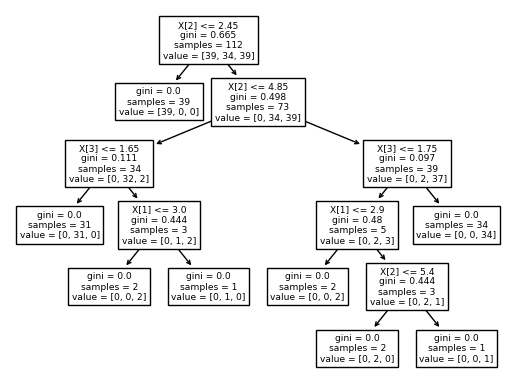

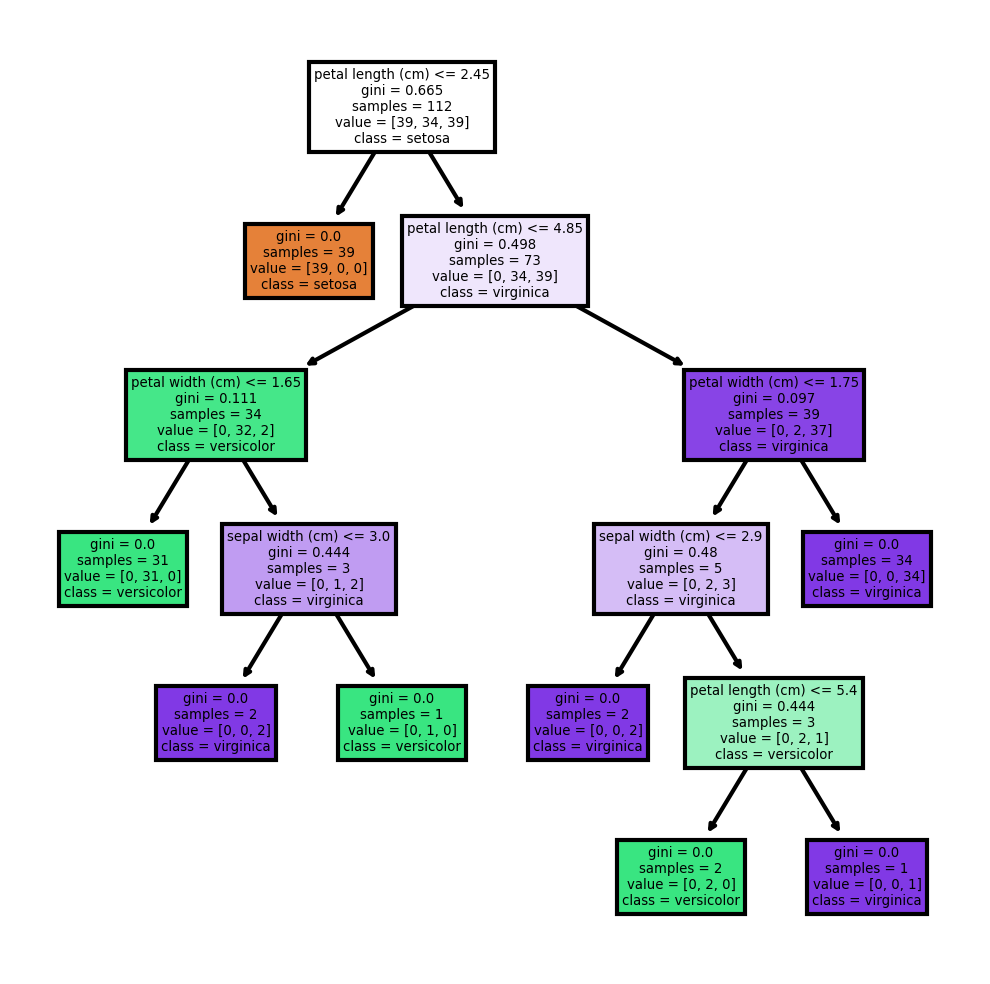

In [21]:
classifier = DecisionTreeClassifier(max_depth = 5)
classifier = classifier.fit(x_train, y_train)

fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor' , 'virginica']

predn = ['setosa (pred)', 'versicolor (pred)' , 'virginica (pred)']

tree.plot_tree(classifier)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)

tree.plot_tree(classifier, feature_names = fn, class_names = cn, filled = True)
plt.show()

In [22]:
y_predict = classifier.predict(x_test)
accuracy = classifier.score(x_test, y_test)
accuracy

plotx = []
ploty = []
plotc = []

for a, b in zip(x_test, y_predict):
    plotx.append(a[0])
    ploty.append(a[1])
    plotc.append(b)
    
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Scatter(x = plotx, y = ploty, mode  = "markers", marker_color = plotc)
)
fig.update_xaxes(title = "Sepal Length")
fig.update_yaxes(title = "Sepal Width")
fig.show()

print("Accuracy", accuracy)


Accuracy 0.9473684210526315


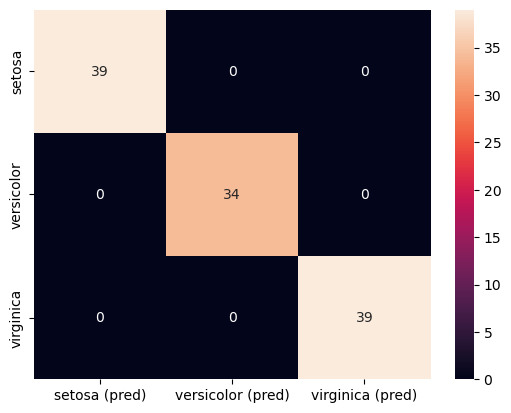

In [24]:
y_tpred = classifier.predict(x_train)
cm = confusion_matrix(y_train, y_tpred)
cm_df = pd.DataFrame(cm, index = [idx for idx in cn], columns = [col for col in predn])
sns.heatmap(cm_df, annot=True)
plt.show()

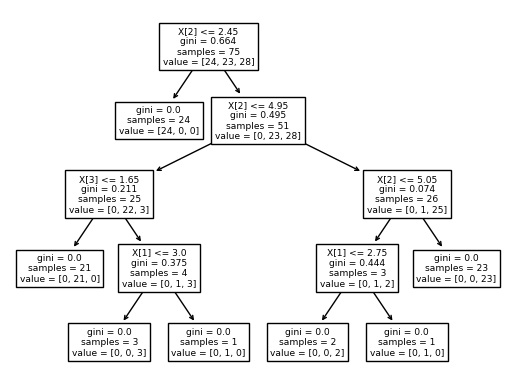

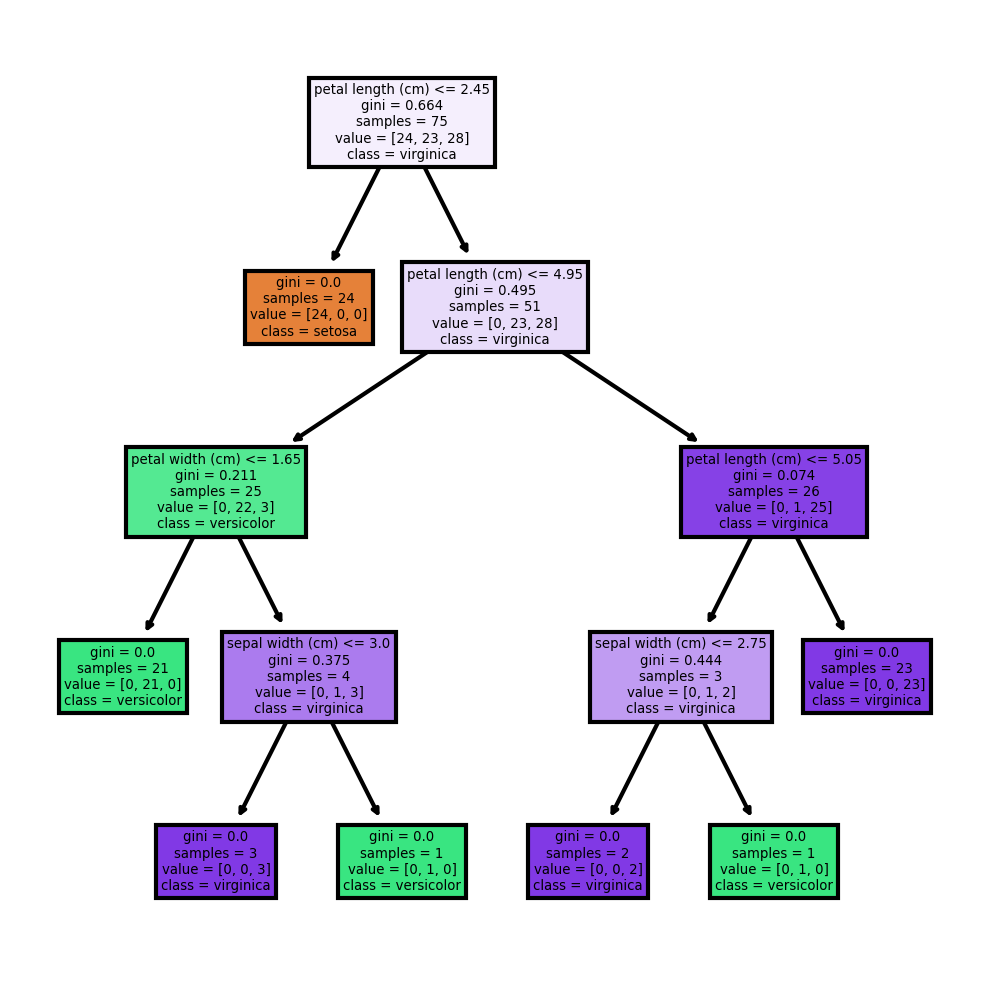

Accuracy 0.9866666666666667


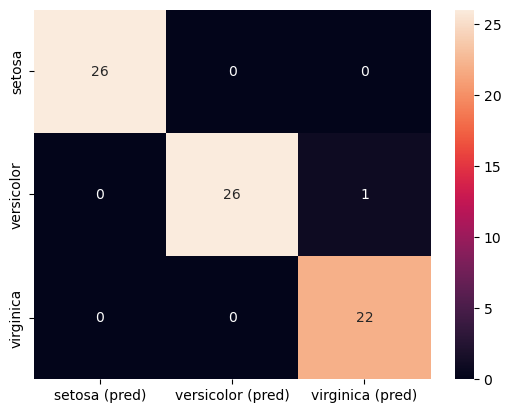

In [19]:
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=31)

plotx = []
ploty = []
for i in x_train:
    plotx.append(i[2])
    ploty.append(i[3])    
    
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Scatter(x = plotx, y = ploty, mode  = "markers")
)
fig.update_xaxes(title = "Petal Length")
fig.update_yaxes(title = "Petal Width")
fig.show()

classifier = DecisionTreeClassifier(max_depth = 8)
classifier = classifier.fit(x_train, y_train)

fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor' , 'virginica']

predn = ['setosa (pred)', 'versicolor (pred)' , 'virginica (pred)']

tree.plot_tree(classifier)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)

tree.plot_tree(classifier, feature_names = fn, class_names = cn, filled = True)
plt.show()

y_predict = classifier.predict(x_test)
accuracy = classifier.score(x_test, y_test)
accuracy

plotx = []
ploty = []
plotc = []

for a, b in zip(x_test, y_predict):
    plotx.append(a[2])
    ploty.append(a[3])
    plotc.append(b)
    
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Scatter(x = plotx, y = ploty, mode  = "markers", marker_color = plotc)
)
fig.update_xaxes(title = "Petal Length")
fig.update_yaxes(title = "Petal Width")
fig.show()

print("Accuracy", accuracy)

cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, index = [idx for idx in cn], columns = [col for col in predn])
sns.heatmap(cm_df, annot=True)
plt.show()